<a href="https://colab.research.google.com/github/nitinfaye/K-means-Clustering-algorithms/blob/main/K_means_Clustering_of_headlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
from scipy.sparse import csr_matrix, lil_matrix
import warnings
%matplotlib inline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("/content/abcnews-date-text_copy.csv",error_bad_lines=False,usecols =["headline_text"])
data.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   headline_text  249 non-null    object
dtypes: object(1)
memory usage: 2.1+ KB


# Deleting dupliate headlines(if any)

In [ ]:
data[data['headline_text'].duplicated(keep=False)].sort_values('headline_text').head(8)

,headline_text


In [ ]:
data = data.drop_duplicates('headline_text')
data.head()


,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


# NLP 

# Preparing data for vectorizaion


# TF-IDF


In [ ]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
news = data['headline_text'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(news)

In [ ]:
word_features = vectorizer.get_feature_names()
print("Number of words=",len(word_features))
print("\n")
print("most common words=",word_features[50:110])

Number of words= 935


most common words= ['ambos', 'ambulance', 'amcor', 'americas', 'anger', 'angry', 'ankle', 'anniversary', 'announced', 'anti', 'antic', 'appointed', 'arabia', 'arabians', 'arabs', 'areas', 'arms', 'army', 'arrested', 'arriving', 'arrogance', 'arsenal', 'art', 'asian', 'ask', 'assurances', 'asylum', 'attack', 'attacks', 'attempt', 'attend', 'aussie', 'aust', 'austeel', 'australia', 'australian', 'authorities', 'autopsy', 'avenges', 'avoid', 'awards', 'aware', 'away', 'awu', 'ayr', 'baby', 'backs', 'bad', 'badly', 'ban', 'bank', 'bans', 'barca', 'basel', 'bathhouse', 'bay', 'beckham', 'begin', 'begins', 'belittling']


# Stemming

# Tokenizing
Tokenization is breaking the sentence into words and punctuation,

In [ ]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

# Vectorization with stop words(words irrelevant to the model), stemming and tokenizing

In [ ]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(news)
word_features2 = vectorizer2.get_feature_names()
print("Number of words=",len(word_features2))
print("\n")
print("most common words",word_features2[:50]) 

Number of words= 829


most common words ['ab', 'aba', 'abandon', 'abattoir', 'aborigin', 'abov', 'academ', 'access', 'accident', 'accus', 'acid', 'act', 'action', 'address', 'administr', 'advertis', 'aec', 'affect', 'afl', 'agreement', 'ahead', 'aid', 'air', 'aircraft', 'ajax', 'al', 'alcohol', 'alinghi', 'alleg', 'alloc', 'alp', 'altern', 'ambiti', 'ambo', 'ambul', 'amcor', 'america', 'anger', 'angri', 'ankl', 'anniversari', 'announc', 'anti', 'antic', 'appoint', 'arab', 'arabia', 'arabian', 'area', 'arm']


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(news)
words = vectorizer3.get_feature_names()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


For this, we will use k-means clustering algorithm.
# K-means clustering


# Elbow method to select number of clusters

Basically, number of clusters = the x-axis value of the point that is the corner of the "elbow"(the plot looks often looks like an elbow)

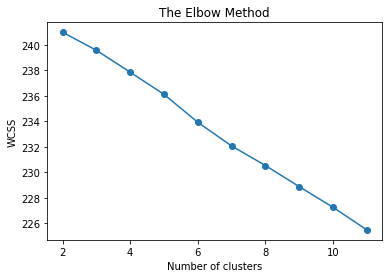

In [ ]:
wcss = []
for i in range(2,12):
    kmeans = KMeans(n_clusters=i+2,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,12),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.savefig('elbow.png')
plt.show()

#Ineteria of cosine

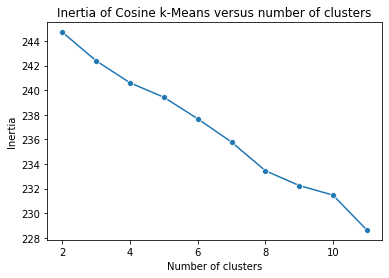

In [ ]:
from sklearn import preprocessing
normalized_vectors = preprocessing.normalize(X3)
scores = [KMeans(n_clusters=i+2).fit(normalized_vectors).inertia_  
          for i in range(10)]
sns.lineplot(np.arange(2, 12), scores,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")
plt.savefig("intertia_cosine_kmeans.jpg", dpi=300)

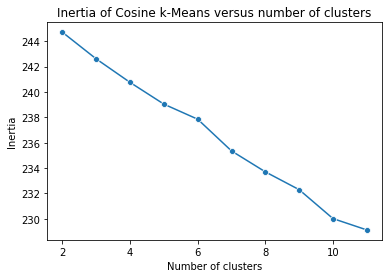

In [ ]:
from sklearn import preprocessing
normalized_vectors = preprocessing.normalize(X3)
scores = [KMeans(n_clusters=i+2).fit(normalized_vectors).inertia_  
          for i in range(10)]
sns.lineplot(np.arange(2, 12), scores,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")
plt.savefig("intertia_cosine_kmeans.jpg", dpi=300)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
# Prepare models
kmeans = KMeans(n_clusters=4).fit(X3)
normalized_vectors = preprocessing.normalize(X3)
normalized_kmeans = KMeans(n_clusters=4).fit(normalized_vectors)
min_samples = X3.shape[1]+1 
dbscan = DBSCAN(eps=4.5, min_samples=min_samples).fit(X3)
# Print results
print('kmeans: {}'.format(silhouette_score(X3, kmeans.labels_, 
                                           metric='euclidean')))
print('Cosine kmeans:{}'.format(silhouette_score(normalized_vectors,
                                          normalized_kmeans.labels_,
                                          metric='cosine')))
#print('DBSCAN: {}'.format(silhouette_score(X3, dbscan.labels_, 
                                           #metric='cosine')))

kmeans: 0.003864479974264795
Cosine kmeans:0.00991630492875014


# 3 Clusters

In [ ]:
kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : plan, nsw, claim, fund, man, iraq, korean, urg, govt, court, subway, death, ethanol, public, help, continu, defend, water, strike, new, warn, murder, crash, miss, meet
1 : council, welcom, insur, secur, decis, chief, breakthrough, appoint, general, step, address, administr, land, manag, vandal, reward, heritag, garden, introduc, levi, ambul, fed, advertis, lament, offer
2 : record, break, barca, profit, ventur, gladston, rare, harrington, away, delight, antic, robson, net, result, amcor, freedom, solid, success, philippoussi, thriller, tie, dent, month, drought, celebr


# 5 Clusters

In [ ]:
kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : man, plan, iraq, claim, fund, nsw, record, urg, defend, warn, crash, meet, break, drink, trial, injur, chang, educ, public, help, ethanol, report, raid, pay, strike
1 : council, welcom, manag, secur, decis, chief, breakthrough, appoint, step, general, address, insur, vote, irrig, land, administr, vandal, reward, heritag, garden, river, ambul, levi, advertis, lament
2 : korean, subway, miss, toll, south, death, continu, cemeteri, fisherman, sign, fund, investig, underway, passeng, die, question, grow, search, nth, japanes, seek, climb, anger, victim, asylum
3 : govt, nt, nurs, boost, intak, crean, seat, lose, nsw, student, veget, ord, resourc, hold, blame, unpopular, arrog, display, stock, paroo, suppli, soldier, direct, defenc, prioriti
4 : court, win, defam, case, face, verdict, murder, wit, awar, refshaug, ayr, pair, teen, sept, german, juri, act, ambiti, olsson, jump, tripl, drug, charg, consid, compo


# 6 Clusters

In [ ]:
kmeans = KMeans(n_clusters = 6, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : nsw, claim, plan, iraq, govt, fund, record, ethanol, opp, water, court, new, break, drink, urg, educ, high, report, pay, british, defend, aust, win, work, nt
1 : korean, subway, help, phone, toll, south, public, fund, death, urg, continu, miss, scam, restor, cossack, homeless, warn, underway, investig, youth, communiti, passeng, die, ambo, wake
2 : crash, injur, head, highway, plane, launch, girl, sparki, probe, ankl, ricciuto, undergo, surgeri, brisban, day, weather, iranian, open, rio, pull, bueno, strike, caus, bad, air
3 : murder, trial, cooma, snowtown, delay, rabbit, control, charg, program, pair, ayr, juri, canola, gm, face, consid, verdict, case, regul, inspect, stand, qaeda, al, arabian, man
4 : council, welcom, decis, chief, job, secur, breakthrough, appoint, step, general, address, insur, wine, bounc, administr, land, manag, attend, reward, vandal, heritag, garden, sack, levi, ambul
5 : man, hijack, arrest, accident, inquest, keno, fraud, jail, knife, irish, omagh, fine,

# 8 Clusters

In [ ]:
kmeans = KMeans(n_clusters = 8, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : nsw, urg, iraq, govt, court, ethanol, public, continu, korean, warn, crash, meet, trial, record, hold, death, report, british, water, win, subway, tell, becom, summit, phone
1 : claim, reject, indigen, polici, caus, educ, high, monopoli, dixon, ambul, levi, autopsi, consent, dismiss, defenc, spend, prioriti, mp, campaign, run, author, spurn, rfs, qanta, code
2 : strike, pay, aust, air, rise, nz, dargo, threat, rebuild, white, crew, intern, sparki, studi, economi, recoveri, slow, expect, hous, day, brisban, alcohol, smoke, demand, travel
3 : man, embassi, raid, aborigin, tent, hijack, arrest, bomb, defend, cooma, inquest, accident, fraud, keno, jail, charg, knife, omagh, irish, murder, fine, nca, light, death, seek
4 : fund, miss, alloc, help, cemeteri, cadel, upgrad, sign, fisherman, subway, cossack, restor, risk, bridg, announc, korean, youth, violenc, domest, work, wake, ambo, victim, aid, chang
5 : council, welcom, insur, secur, decis, chief, breakthrough, appoint, general, step

##Visualizing document clusters

In [ ]:
X3 = lil_matrix(X3).toarray()


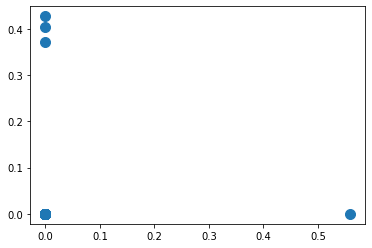

In [ ]:
plt.scatter(X3[:,8], X3[:,9], s=100);

In [ ]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X3)
y_km = kmeans.predict(X3)

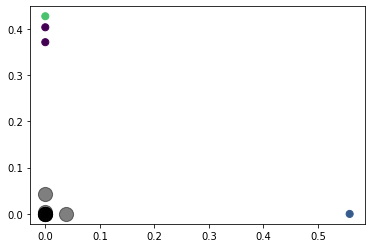

In [ ]:
plt.scatter(X3[:, 8], X3[:, 9], c=y_km, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 8], centers[:, 9], c='black', s=200, alpha=0.5);

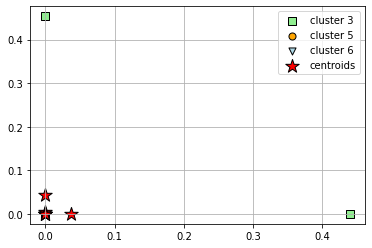

In [ ]:
# plot the 3 clusters
plt.scatter(
    X3[y_km == 0, 0], X3[y_km == 0, 1],
    s=50, c='lightgreen',
    marker= 's', edgecolor='black',
    label= 'cluster 3'
)

plt.scatter(
    X3[y_km == 1, 0], X3[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 5'
)

plt.scatter(
    X3[y_km == 2, 0], X3[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 6'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 8], kmeans.cluster_centers_[:, 9],
    s=200, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
print(words[250:300])

['disput', 'distanc', 'divis', 'dixon', 'doctor', 'dog', 'domest', 'donat', 'doubl', 'doubtconflict', 'downer', 'dream', 'drink', 'driver', 'drought', 'drug', 'dubai', 'earn', 'eas', 'east', 'economi', 'educ', 'effect', 'ei', 'elimin', 'elster', 'embassi', 'emerg', 'encourag', 'end', 'england', 'entomb', 'entri', 'epa', 'ethanol', 'execut', 'expect', 'experi', 'express', 'face', 'fail', 'fan', 'farmer', 'fate', 'favourit', 'fear', 'featur', 'fed', 'feder', 'feed']


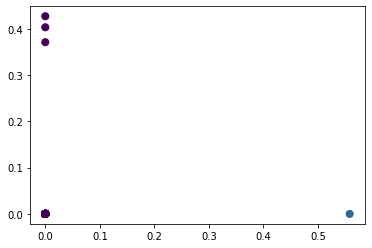

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X3, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X3[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X3, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X3[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X3, 4)
plt.scatter(X3[:, 8], X3[:, 9], c=labels,
            s=50, cmap='viridis');


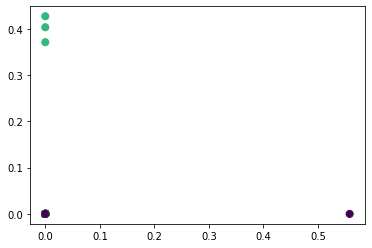

In [ ]:
centers, labels = find_clusters(X3, 4, rseed=0)
plt.scatter(X3[:, 8], X3[:, 9], c=labels,
            s=50, cmap='viridis');

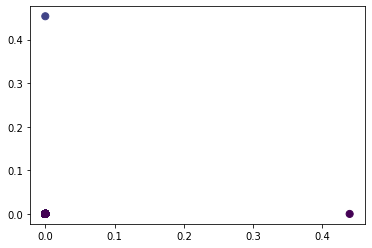

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X3)
plt.scatter(X3[:, 0], X3[:, 1], c=labels,
            s=50, cmap='viridis');
